# Machine Learning in Cybersecurity
Professor : Shanchieh Yang<br>
Student   :   Vazgen Tadevosyan <br></p>




1. [Imports](#1)
2. [SMOTE](#2)

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
#for not showing warnings
from sklearn.metrics import f1_score, make_scorer
import os
import time
import glob
import warnings
warnings.filterwarnings('ignore')
#data manipulation and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
#libraries for modelling and evaluation
from scipy import stats
from sklearn.metrics import  roc_curve
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from  sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import  cross_val_score
from sklearn.linear_model import  LogisticRegression
from statsmodels.discrete.discrete_model import Logit 
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
#in case of error run <<!pip install>> and run the code again
#in case of error run <<!pip install 'missing library'>> and run the code again
pd.set_option('max_rows', 100)
pd.set_option('max_colwidth', 100)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 100]


Base Line

In [110]:
data = pd.read_csv("/content/drive/MyDrive/RIT/CyberSecurity/Data/preprocessed.csv")
dct = {"DoS attacks-SlowHTTPTest":"Group1",'SSH-Bruteforce':'Group1',"Bot":"Group2","DDOS attack-HOIC":"Group2","DoS attacks-Hulk":"Group2"}
y = data["Label"]
X = data.loc[:,~data.columns.isin(["Label"])]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42,stratify = y)
scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
# X_test = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)
print("Label distribution of test data")
print(y_test.value_counts(normalize=True),"\n"*2)
print("Label distribution of train data")
y_train.value_counts(normalize=True)

Label distribution of test data
Benign                      0.816689
DDOS attack-HOIC            0.049566
DoS attacks-SlowHTTPTest    0.046429
DDoS attacks-LOIC-HTTP      0.023214
DoS attacks-Hulk            0.019032
Infilteration               0.016208
Bot                         0.011084
FTP-BruteForce              0.008470
SSH-Bruteforce              0.007529
DoS attacks-GoldenEye       0.001778
Name: Label, dtype: float64 


Label distribution of train data


Benign                      0.816715
DDOS attack-HOIC            0.049540
DoS attacks-SlowHTTPTest    0.046403
DDoS attacks-LOIC-HTTP      0.023188
DoS attacks-Hulk            0.019032
Infilteration               0.016261
Bot                         0.011137
FTP-BruteForce              0.008444
SSH-Bruteforce              0.007451
DoS attacks-GoldenEye       0.001830
Name: Label, dtype: float64

In [111]:
Y1=y_train
X1=X_train  

grid1 = GridSearchCV(RandomForestClassifier(random_state=42,class_weight="balanced"),
             param_grid={"max_depth":range(20,40,5),
                         "min_samples_leaf":range(15,25,5) },scoring="f1_micro",cv=5,n_jobs=-1).fit(X1,Y1)

params=list(grid1.best_params_.values())

max_depth,min_samples_leaf=params
x_test,y_test=X_test,y_test
start_time = time.time()
forest=RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=max_depth,min_samples_leaf=max_depth).fit(X1,Y1)

end_time = time.time()
timer = end_time-start_time
print(f"Time is {timer}")

train_score=forest.score(X1,Y1)
test_score=forest.score(x_test,y_test)
print(grid1.best_params_)
print("Train score is %s and Test score is%s"%(train_score,test_score))
print("cross_validation score is %s"% (np.mean(cross_val_score(RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=max_depth,min_samples_leaf=min_samples_leaf),X1,Y1,cv=5))))
y_pred_train=forest.predict(x_test)
y_pred_test=forest.predict(X1)
print(classification_report(y_test,forest.predict(x_test)))

Time is 7.754459381103516
{'max_depth': 35, 'min_samples_leaf': 15}
Train score is 0.9205793161141901 and Test score is0.9100700616961205
cross_validation score is 0.9432708134183836
                          precision    recall  f1-score   support

                  Benign       0.99      0.91      0.95      7810
                     Bot       0.86      1.00      0.93       106
        DDOS attack-HOIC       0.93      0.99      0.96       474
  DDoS attacks-LOIC-HTTP       0.85      0.99      0.92       222
   DoS attacks-GoldenEye       0.52      1.00      0.68        17
        DoS attacks-Hulk       0.99      0.99      0.99       182
DoS attacks-SlowHTTPTest       0.91      0.98      0.95       444
          FTP-BruteForce       0.85      0.48      0.61        81
           Infilteration       0.09      0.40      0.15       155
          SSH-Bruteforce       1.00      1.00      1.00        72

                accuracy                           0.91      9563
               macro av

In [107]:
data = pd.read_csv("/content/drive/MyDrive/RIT/CyberSecurity/Data/preprocessed.csv")
dct = {"DoS attacks-SlowHTTPTest":"Group1",'SSH-Bruteforce':'Group1',"Bot":"Group2","DDOS attack-HOIC":"Group2","DoS attacks-Hulk":"Group2"}
y = data["Label"]
X = data.loc[:,~data.columns.isin(["Label"])]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42,stratify = y)
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)
print("Label distribution of test data")
print(y_test.value_counts(normalize=True),"\n"*2)
print("Label distribution of train data")
y_train.value_counts(normalize=True)

Label distribution of test data
Benign                      0.816689
DDOS attack-HOIC            0.049566
DoS attacks-SlowHTTPTest    0.046429
DDoS attacks-LOIC-HTTP      0.023214
DoS attacks-Hulk            0.019032
Infilteration               0.016208
Bot                         0.011084
FTP-BruteForce              0.008470
SSH-Bruteforce              0.007529
DoS attacks-GoldenEye       0.001778
Name: Label, dtype: float64 


Label distribution of train data


Benign                      0.816715
DDOS attack-HOIC            0.049540
DoS attacks-SlowHTTPTest    0.046403
DDoS attacks-LOIC-HTTP      0.023188
DoS attacks-Hulk            0.019032
Infilteration               0.016261
Bot                         0.011137
FTP-BruteForce              0.008444
SSH-Bruteforce              0.007451
DoS attacks-GoldenEye       0.001830
Name: Label, dtype: float64

In [87]:
y.value_counts()

Benign                      39051
DDOS attack-HOIC             2369
DoS attacks-SlowHTTPTest     2219
DDoS attacks-LOIC-HTTP       1109
DoS attacks-Hulk              910
Infilteration                 777
Bot                           532
FTP-BruteForce                404
SSH-Bruteforce                357
DoS attacks-GoldenEye          87
Name: Label, dtype: int64

Class=Benign, n=31241 (10.000%)
Class=DoS attacks-Hulk, n=31241 (10.000%)
Class=DoS attacks-SlowHTTPTest, n=31241 (10.000%)
Class=DDoS attacks-LOIC-HTTP, n=31241 (10.000%)
Class=FTP-BruteForce, n=31241 (10.000%)
Class=SSH-Bruteforce, n=31241 (10.000%)
Class=DDOS attack-HOIC, n=31241 (10.000%)
Class=Infilteration, n=31241 (10.000%)
Class=Bot, n=31241 (10.000%)
Class=DoS attacks-GoldenEye, n=31241 (10.000%)


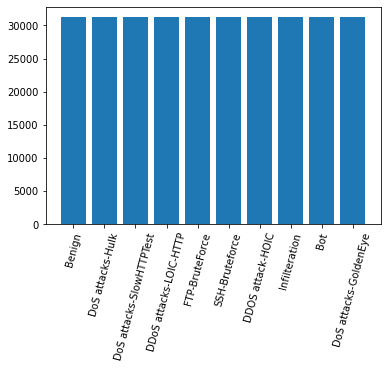

In [88]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# label encode the target variable
#y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X_train2, y_train2 = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train2)
for k,v in counter.items():
	per = v / len(y_train2) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
plt.xticks(rotation = 75) # Rotates X-Axis Ticks by 75-degrees
pyplot.show()

In [89]:
Y1=y_train2
X1=X_train2  

grid1 = GridSearchCV(RandomForestClassifier(random_state=42,class_weight="balanced"),
             param_grid={"max_depth":range(10,30,5),
                         "min_samples_leaf":range(10,40,15) },scoring="f1_macro",cv=5,n_jobs=-1).fit(X1,Y1)

params=list(grid1.best_params_.values())

max_depth,min_samples_leaf=params
x_test,y_test=X_test,y_test
start_time = time.time()
forest=RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=max_depth,min_samples_leaf=max_depth).fit(X1,Y1)

end_time = time.time()
timer = end_time-start_time
print(f"Time is {timer}")

train_score=forest.score(X1,Y1)
test_score=forest.score(x_test,y_test)
print(grid1.best_params_)
print("Train score is %s and Test score is%s"%(train_score,test_score))
print("cross_validation score is %s"% (np.mean(cross_val_score(RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=max_depth,min_samples_leaf=min_samples_leaf),X1,Y1,cv=5))))
y_pred_train=forest.predict(x_test)
y_pred_test=forest.predict(X1)
print(classification_report(y_test,forest.predict(x_test)))
# print("roc_auc: for test is",roc_auc_score(y_test,y_pred_test))
# print("roc_auc: for train is",roc_auc_score(Y1,y_pred_train))
# print("average Roc_score is",grid1.best_score_)
# print("recall for train",recall_score(Y1,y_pred_train))
# print("recall for test",recall_score(y_test,y_pred_test))

# #ROC curve
# FPR,TPR,tresholds=roc_curve(y_test,forest.predict_proba(X_test)[:,1])
# plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test,y_pred_test))
# plt.plot([0,1],[0,1])
# plt.legend(loc="lower right")
# plt.xlabel("FPR")
# plt.ylabel("TPR")
# plt.show()



Time is 69.27221488952637
{'max_depth': 25, 'min_samples_leaf': 10}
Train score is 0.9320348260298966 and Test score is0.9335982432291122
cross_validation score is 0.9328446592618675
                          precision    recall  f1-score   support

                  Benign       0.99      0.94      0.96      7810
                     Bot       0.92      1.00      0.96       106
        DDOS attack-HOIC       0.96      1.00      0.98       474
  DDoS attacks-LOIC-HTTP       0.93      0.99      0.96       222
   DoS attacks-GoldenEye       1.00      1.00      1.00        17
        DoS attacks-Hulk       1.00      1.00      1.00       182
DoS attacks-SlowHTTPTest       0.91      0.98      0.95       444
          FTP-BruteForce       0.83      0.49      0.62        81
           Infilteration       0.12      0.41      0.19       155
          SSH-Bruteforce       1.00      1.00      1.00        72

                accuracy                           0.93      9563
               macro av

Grouping method

In [90]:
y_train.value_counts()

Benign                      31241
DDOS attack-HOIC             1895
DoS attacks-SlowHTTPTest     1775
DDoS attacks-LOIC-HTTP        887
DoS attacks-Hulk              728
Infilteration                 622
Bot                           426
FTP-BruteForce                323
SSH-Bruteforce                285
DoS attacks-GoldenEye          70
Name: Label, dtype: int64

Class=Benign, n=31241 (25.768%)
Class=DoS attacks-Hulk, n=10000 (8.248%)
Class=DoS attacks-SlowHTTPTest, n=10000 (8.248%)
Class=DDoS attacks-LOIC-HTTP, n=10000 (8.248%)
Class=FTP-BruteForce, n=10000 (8.248%)
Class=SSH-Bruteforce, n=10000 (8.248%)
Class=DDOS attack-HOIC, n=10000 (8.248%)
Class=Infilteration, n=10000 (8.248%)
Class=Bot, n=10000 (8.248%)
Class=DoS attacks-GoldenEye, n=10000 (8.248%)


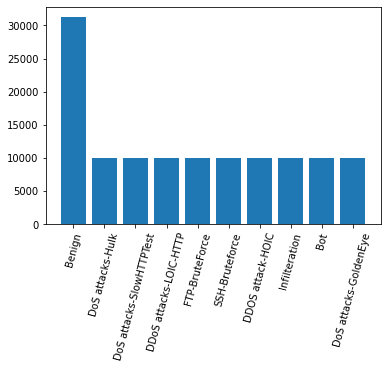

In [91]:
strategy = {'DoS attacks-SlowHTTPTest':10000, 'DDOS attack-HOIC':10000,
       'DoS attacks-Hulk':10000, 'Infilteration':10000, 'Bot':10000,
       'DDoS attacks-LOIC-HTTP':10000, 'SSH-Bruteforce':10000, 'FTP-BruteForce':10000,
       'DoS attacks-GoldenEye':10000}
oversample = SMOTE(sampling_strategy=strategy)
# example of oversampling a multi-class classification dataset with a custom strategy
oversample = SMOTE(sampling_strategy=strategy)
X3, y3 = oversample.fit_resample(X_train, y_train)
counter = Counter(y3)
for k,v in counter.items():
	per = v / len(y3) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
plt.xticks(rotation = 75) 
pyplot.show()
# Rotates X-Axis Ticks by 75-degrees


In [92]:
Y1=y3
X1=X3  

grid1 = GridSearchCV(RandomForestClassifier(random_state=42,class_weight="balanced"),
             param_grid={"max_depth":range(10,40,15),
                         "min_samples_leaf":range(10,40,15) },scoring="f1_macro",cv=5,n_jobs=-1).fit(X1,Y1)

params=list(grid1.best_params_.values())

max_depth,min_samples_leaf=params
x_test,y_test=X_test,y_test
start_time = time.time()
forest=RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=max_depth,min_samples_leaf=max_depth).fit(X1,Y1)

end_time = time.time()
timer = end_time-start_time
print(f"Time is {timer}")

train_score=forest.score(X1,Y1)
test_score=forest.score(x_test,y_test)
print(grid1.best_params_)
print("Train score is %s and Test score is%s"%(train_score,test_score))
print("cross_validation score is %s"% (np.mean(cross_val_score(RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=max_depth,min_samples_leaf=min_samples_leaf),X1,Y1,cv=5))))
y_pred_train=forest.predict(x_test)
y_pred_test=forest.predict(X1)
print(classification_report(y_test,forest.predict(x_test)))



Time is 26.139493942260742
{'max_depth': 25, 'min_samples_leaf': 10}
Train score is 0.9285555216469676 and Test score is0.9055735647809264
cross_validation score is 0.9297103076041366
                          precision    recall  f1-score   support

                  Benign       0.99      0.92      0.95      7810
                     Bot       0.90      1.00      0.95       106
        DDOS attack-HOIC       0.97      1.00      0.98       474
  DDoS attacks-LOIC-HTTP       0.92      0.99      0.95       222
   DoS attacks-GoldenEye       0.89      1.00      0.94        17
        DoS attacks-Hulk       1.00      0.99      1.00       182
DoS attacks-SlowHTTPTest       0.96      0.55      0.69       444
          FTP-BruteForce       0.26      0.86      0.40        81
           Infilteration       0.11      0.42      0.17       155
          SSH-Bruteforce       1.00      1.00      1.00        72

                accuracy                           0.91      9563
               macro a

Class=Benign, n=15000 (14.286%)
Class=Bot, n=10000 (9.524%)
Class=DDOS attack-HOIC, n=10000 (9.524%)
Class=DDoS attacks-LOIC-HTTP, n=10000 (9.524%)
Class=DoS attacks-GoldenEye, n=10000 (9.524%)
Class=DoS attacks-Hulk, n=10000 (9.524%)
Class=DoS attacks-SlowHTTPTest, n=10000 (9.524%)
Class=FTP-BruteForce, n=10000 (9.524%)
Class=Infilteration, n=10000 (9.524%)
Class=SSH-Bruteforce, n=10000 (9.524%)


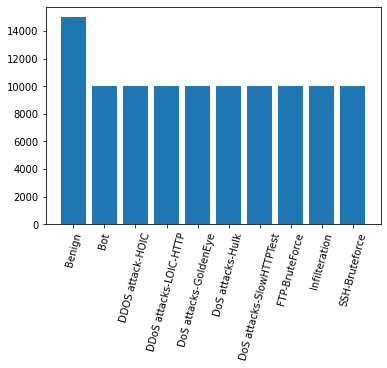

In [93]:
from imblearn.under_sampling import RandomUnderSampler
strategy = {'Benign':15000}
under = RandomUnderSampler(sampling_strategy=strategy)
X4, y4 = under.fit_resample(X_train, y_train)
strategy2 =  {'DoS attacks-SlowHTTPTest':10000, 'DDOS attack-HOIC':10000,
       'DoS attacks-Hulk':10000, 'Infilteration':10000, 'Bot':10000,
       'DDoS attacks-LOIC-HTTP':10000, 'SSH-Bruteforce':10000, 'FTP-BruteForce':10000,
       'DoS attacks-GoldenEye':10000}
oversample = SMOTE(sampling_strategy=strategy2)
X5, y5 = oversample.fit_resample(X4, y4)
counter = Counter(y5)
for k,v in counter.items():
	per = v / len(y5) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
plt.xticks(rotation = 75) 
pyplot.show()
# Rotates X-Axis Ticks by 75-degrees


In [94]:
Y1=y4
X1=X4  

grid1 = GridSearchCV(RandomForestClassifier(random_state=42,class_weight="balanced"),
             param_grid={"max_depth":range(10,30,5),
                         "min_samples_leaf":range(10,40,15) },scoring="f1_macro",cv=5,n_jobs=-1).fit(X1,Y1)

params=list(grid1.best_params_.values())

max_depth,min_samples_leaf=params
x_test,y_test=X_test,y_test
start_time = time.time()
forest=RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=max_depth,min_samples_leaf=max_depth).fit(X1,Y1)

end_time = time.time()
timer = end_time-start_time
print(f"Time is {timer}")

train_score=forest.score(X1,Y1)
test_score=forest.score(x_test,y_test)
print(grid1.best_params_)
print("Train score is %s and Test score is%s"%(train_score,test_score))
print("cross_validation score is %s"% (np.mean(cross_val_score(RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=max_depth,min_samples_leaf=min_samples_leaf),X1,Y1,cv=5))))
y_pred_train=forest.predict(x_test)
y_pred_test=forest.predict(X1)
print(classification_report(y_test,forest.predict(x_test)))


Time is 4.147768974304199
{'max_depth': 20, 'min_samples_leaf': 10}
Train score is 0.9215392303848076 and Test score is0.9078740980863745
cross_validation score is 0.914997931586648
                          precision    recall  f1-score   support

                  Benign       0.99      0.91      0.95      7810
                     Bot       0.90      1.00      0.95       106
        DDOS attack-HOIC       0.93      0.99      0.96       474
  DDoS attacks-LOIC-HTTP       0.88      0.99      0.93       222
   DoS attacks-GoldenEye       0.62      0.94      0.74        17
        DoS attacks-Hulk       1.00      0.99      0.99       182
DoS attacks-SlowHTTPTest       0.91      0.98      0.94       444
          FTP-BruteForce       0.80      0.49      0.61        81
           Infilteration       0.09      0.41      0.15       155
          SSH-Bruteforce       0.83      1.00      0.91        72

                accuracy                           0.91      9563
               macro avg

In [98]:
data = pd.read_csv("/content/drive/MyDrive/RIT/CyberSecurity/Data/preprocessed.csv")
dct = {"DoS attacks-SlowHTTPTest":"Group1",'FTP-BruteForce':'Group1',"Bot":"Group2","DDOS attack-HOIC":"Group2","DoS attacks-Hulk":"Group2"}
y = data.replace({"Label":dct})["Label"]
X = data.loc[:,~data.columns.isin(["Label"])]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42,stratify = y)
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)
print("Label distribution of test data")
print(y_test.value_counts(normalize=True),"\n"*2)
print("Label distribution of train data")
y_train.value_counts(normalize=True)

Label distribution of test data
Benign                    0.816689
Group2                    0.079682
Group1                    0.054899
DDoS attacks-LOIC-HTTP    0.023214
Infilteration             0.016208
SSH-Bruteforce            0.007529
DoS attacks-GoldenEye     0.001778
Name: Label, dtype: float64 


Label distribution of train data


Benign                    0.816715
Group2                    0.079708
Group1                    0.054847
DDoS attacks-LOIC-HTTP    0.023188
Infilteration             0.016261
SSH-Bruteforce            0.007451
DoS attacks-GoldenEye     0.001830
Name: Label, dtype: float64

Class=Benign, n=31241 (14.286%)
Class=Group2, n=31241 (14.286%)
Class=SSH-Bruteforce, n=31241 (14.286%)
Class=Group1, n=31241 (14.286%)
Class=Infilteration, n=31241 (14.286%)
Class=DDoS attacks-LOIC-HTTP, n=31241 (14.286%)
Class=DoS attacks-GoldenEye, n=31241 (14.286%)


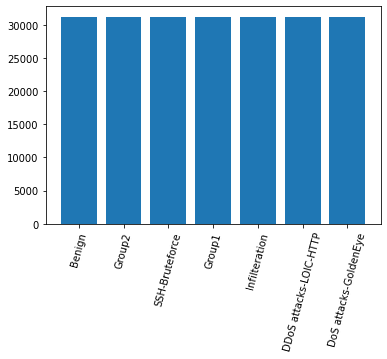

In [99]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# label encode the target variable
#y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X_train2, y_train2 = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train2)
for k,v in counter.items():
	per = v / len(y_train2) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
plt.xticks(rotation = 75) # Rotates X-Axis Ticks by 75-degrees


pyplot.show()

In [100]:
Y1=y_train2
X1=X_train2  

grid1 = GridSearchCV(RandomForestClassifier(random_state=42,class_weight="balanced"),
             param_grid={"max_depth":range(10,30,5),
                         "min_samples_leaf":range(10,40,15) },scoring="f1_macro",cv=5,n_jobs=-1).fit(X1,Y1)

params=list(grid1.best_params_.values())

max_depth,min_samples_leaf=params
x_test,y_test=X_test,y_test
start_time = time.time()
forest=RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=max_depth,min_samples_leaf=max_depth).fit(X1,Y1)

end_time = time.time()
timer = end_time-start_time
print(f"Time is {timer}")

train_score=forest.score(X1,Y1)
test_score=forest.score(x_test,y_test)
print(grid1.best_params_)
print("Train score is %s and Test score is%s"%(train_score,test_score))
print("cross_validation score is %s"% (np.mean(cross_val_score(RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=max_depth,min_samples_leaf=min_samples_leaf),X1,Y1,cv=5))))
y_pred_train=forest.predict(x_test)
y_pred_test=forest.predict(X1)
print(classification_report(y_test,forest.predict(x_test)))



Time is 53.00731635093689
{'max_depth': 25, 'min_samples_leaf': 10}
Train score is 0.9844206560060726 and Test score is0.936317055317369
cross_validation score is 0.9864326751372717
                        precision    recall  f1-score   support

                Benign       0.99      0.94      0.96      7810
DDoS attacks-LOIC-HTTP       0.94      0.99      0.96       222
 DoS attacks-GoldenEye       0.94      1.00      0.97        17
                Group1       1.00      1.00      1.00       525
                Group2       0.94      0.99      0.97       762
         Infilteration       0.10      0.32      0.16       155
        SSH-Bruteforce       1.00      1.00      1.00        72

              accuracy                           0.94      9563
             macro avg       0.84      0.89      0.86      9563
          weighted avg       0.97      0.94      0.95      9563



In [112]:
from sklearn.inspection import permutation_importance

In [116]:
forest.feature_importances_

array([0.03511244, 0.01969464, 0.01331667, 0.01482577, 0.00656925,
       0.01169716, 0.00208443, 0.01260581, 0.00697103, 0.00720837,
       0.00077914, 0.00955703, 0.00609881, 0.00634169, 0.04300008,
       0.03975753, 0.01163634, 0.04176829, 0.03748421, 0.02555553,
       0.03116936, 0.00393053, 0.02860042, 0.02924694, 0.00568258,
       0.00946373, 0.00533665, 0.00578922, 0.00425192, 0.        ,
       0.        , 0.        , 0.        , 0.04989119, 0.02270819,
       0.04527233, 0.03365676, 0.00085897, 0.00713991, 0.00876484,
       0.00808219, 0.00562928, 0.        , 0.        , 0.00242954,
       0.00714903, 0.00889765, 0.        , 0.        , 0.00430132,
       0.00210402, 0.00703796, 0.01014326, 0.00925407, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01852796, 0.01362865, 0.01649537, 0.01022604, 0.0878058 ,
       0.02871974, 0.00724362, 0.09861103, 0.00021627, 0.00020408,
       0.00040606, 0.00052973, 0.00386751, 0.00035314, 0.00199

Text(0.5, 0, 'Random Forest Feature Importance')

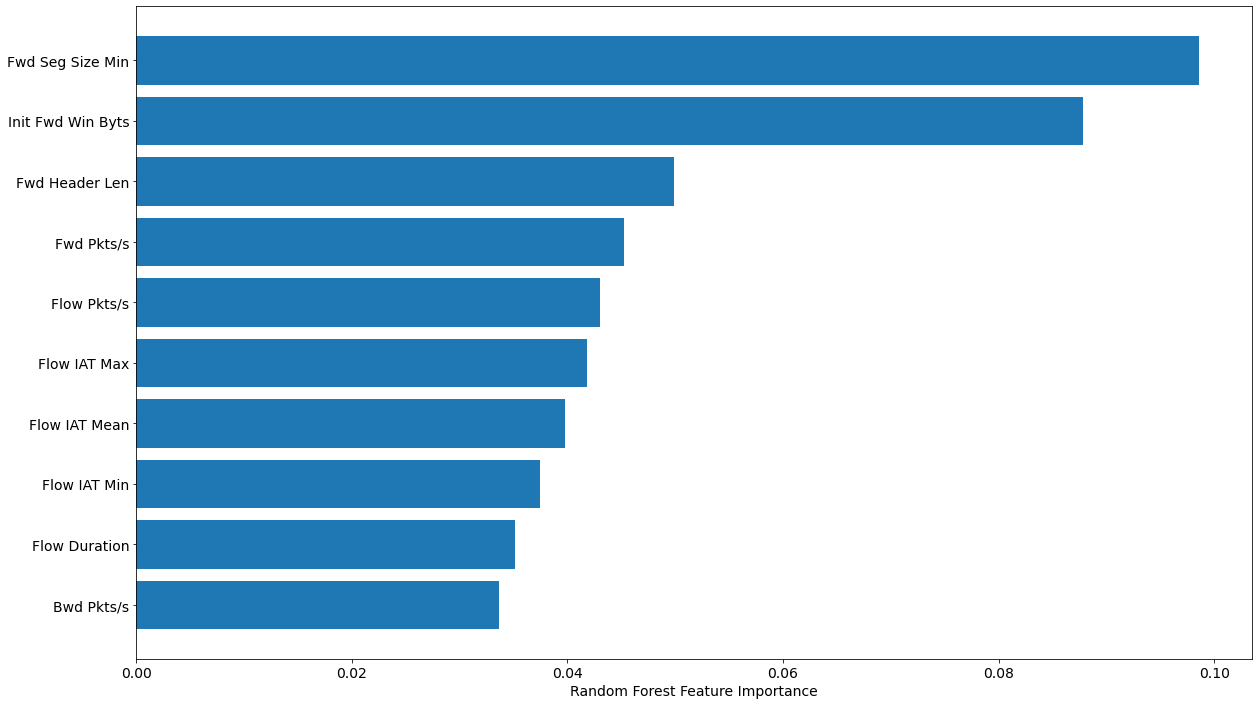

In [124]:
plt.rcParams.update({'figure.figsize': (20.0, 12.0)})
plt.rcParams.update({'font.size': 14})
sorted_idx = forest.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][-10:], forest.feature_importances_[sorted_idx][-10:])
plt.xlabel("Random Forest Feature Importance")